### model_validation.py

---
Available methods are the followings:
1. eval_classifier 
2. cfm_plot
3. f1score_plot
4. gini_plot
5. dist_plot
6. ks_plot
7. gains_plot
8. lift_plot
9. create_cmap

### Google.colab
Only execute this cell when use on google colab platform (colab).

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://github.com/Nak007/model_validation">
    <img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
</table>

In [ ]:
# Mount with google drive.
from google.colab import drive
drive.mount('/content/dirve')

# Import other libraries required.
# All *.py will be stored under the following 
# location i.e. '/content/supervised_binning'.
!git clone 'http://github.com/Nak007/model_validation.git'

## Example

In [1]:
import pandas as pd, numpy as np, sys
import matplotlib.pyplot as plt

sys.path.append('/content/model_validation')
from model_validation import *
pd.options.display.float_format = '{:,.4f}'.format

In [13]:
from sklearn.datasets import load_breast_cancer as data
X, y = data(return_X_y = True)
X = pd.DataFrame(X, columns=[s.replace(' ','_') for s in data().feature_names])

In this analysis, we focus on `malignant tumor` cases. Thus, the target has to be switched since `benign` is initially assigned as a target.

In [14]:
y = np.where(y==1,0,1)

In [90]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=5, max_depth=5, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=5, n_estimators=5, random_state=0)

In [92]:
y_proba = clf.predict_proba(X)[:,1].ravel()

Change `figure.figsize`.

In [93]:
plt.rcParams['figure.figsize']= (6,4)

**<font size=4>( 1 ) Confusion Matrix</font>**

A confusion matrix, also known as an error matrix, is a specific table layout that allows visualization of the performance of an algorithm, typically a supervised learning one. This table is comprised of four elements, which are True-Positive, False-Positive, True-Negative, and False-Negative. 

See ( **cfm_plot.\_\_doc_\_** ) for required parameters.

<AxesSubplot:xlabel='Actual', ylabel='Predict\n(cutoff = 50.00%)'>

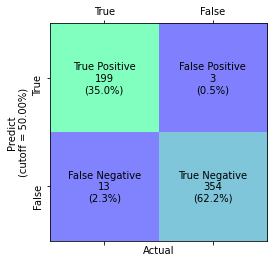

In [155]:
cfm_plot(y, y_proba, **{'threshold': 0.5, 
                        'mat_dict' : {'cmap' : plt.cm.winter}})

**<font size=4>( 2 ) F1-Score</font>**

The F-score, also called the F1-score, is a measure of a model’s accuracy on a dataset. It is used to evaluate binary classification systems, which classify examples into ‘positive’ or ‘negative’. The F-score is a way of combining the precision and recall of the model, and it is defined as the harmonic mean of the model’s precision and recall.

See ( **f1score_plot.\_\_doc_\_** ) for required parameters.

<AxesSubplot:title={'center':'F1-Score curves (Harmonic mean)'}, xlabel='Probability (P)', ylabel='F1-Score'>

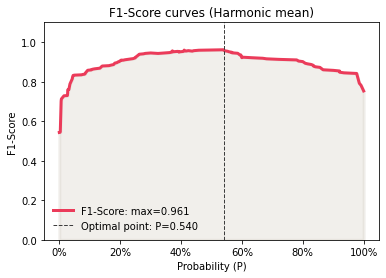

In [159]:
f1score_plot(y, y_proba, **{'plot_dict': {'linewidth': 3},
                            'fill_dict': {'alpha'    : 0.3, 
                                          'linewidth': 3}})

**<font size=4>( 3 ) Gini index</font>**

The `ROC` curve is the display of `sensitivity` and `1-specificity` for different cut-off values for probability (If the probability of positive response is above the cut-off, we predict a positive outcome, if not we are predicting a negative one). Each cut-off value defines one point on `ROC` curve, ranging cut-off from 0 to 1 will draw the whole `ROC` curve. Moreover, `sensitivity` measures the rate of correctly predicted samples with a positive response, while `1-specificity` measures the rate of incorrectly predicted samples with a negative response. Both parameters can be expressed as follows;

- $sensitivity = \frac{TP}{(TP + FN)}$


- $1 - specificity = 1 - \frac{TN}{(TN + FP)}$ or $\frac{FP}{(TN + FP)}$

The `Gini` coefficient is the area or ROC curve above the random classifier (diagonal line) that indicates the model’s discriminatory power, namely, the effectiveness of the model in differentiating between target, and non-target (binary classification). `Gini` can be expressed mathematically as follows;

- $Gini = 2(AUC) - 1$, where `AUC` is Area Under `ROC` curve

See ( **gini_plot.\_\_doc_\_** ) for required parameters.

<AxesSubplot:title={'center':'Receiver Operating Characteristic curve'}, xlabel='False Positive Rate\n(1-Specificity)', ylabel='True Positive Rate\n(Sensitivity)'>

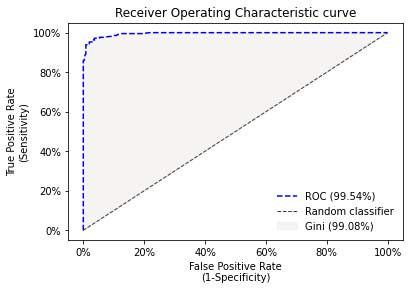

In [160]:
gini_plot( y, y_proba, **{'plot_dict': {'color'    : 'blue', 
                                        'linestyle': '--'}})

**<font size=4>( 4 ) Distribution plot</font>**

Distribution plot is intended to illustrate the separation of two distributions from binary classification, according to obtained probabilities.

See ( **dist_plot.\_\_doc_\_** ) for required parameters.

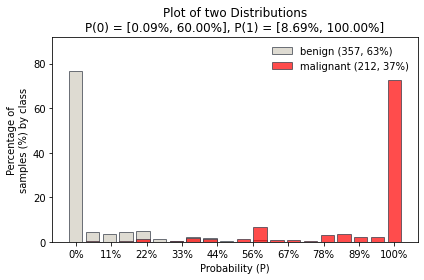

In [161]:
fig, ax = plt.subplots()
dist_plot(y, y_proba , **{'n_tick'  : 10, 
                          'bins'    : 20, 
                          'labels'  : data().target_names[::-1], 
                          'bar_dict': {'width' : 0.8, 
                                       'alpha' : 0.7},
                          'ax' : ax})
fig.tight_layout()
plt.show()

**<font size=4>( 5 ) Kolmogorov–Smirnov</font>**

The Kolmogorov–Smirnov test is a nonparametric test of the equality of continuous, one-dimensional probability distributions that can be used to compare a sample with a reference probability distribution (one-sample KS test), or to compare two samples.
    
See ( **ks_plot.\_\_doc_\_** ) for required parameters.

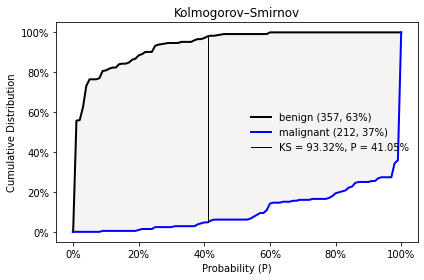

In [162]:
fig, ax = plt.subplots()
ks_plot(y, y_proba, **{'labels' : data().target_names[::-1],
                       'colors' : ['black', 'blue'],
                       'ax':ax})
fig.tight_layout()
plt.show()

From `Distibution plot`, and `Kolmogorov–Smirnov` test, they clearly illustrate the separation between `benign` and `malignant`. The former allows dissimilarity of two distributions to be either identified from visual observation or quantified by performing statistical means such as `Student's t-test` or `Chi-squared test`. The latter uses a maximum distance (`KS`) between two empirical distribution functions of two samples.

**<font size=4>( 6 ) Gains chart</font>**

`Gains` chart is used to evaluate performance of classification model. It measures how much better one can expect to do with the predictive model comparing without a model (randomness). It plots the cumulative percentage of predicted samples (x-axis) against the cumulative percentage of correctly predicted samples with a positive response (y-axis), which can be expressed as follows:

- $sensitivity = \frac{TP}{(TP + FN)}$ (y-axis)


- $support = \frac{TP+FP}{N}$ (x-axis)

See ( **gain_plot.\_\_doc_\_** ) for required parameters.

<AxesSubplot:title={'center':'Gains Chart'}, xlabel='Percentage of targeted samples (Support)', ylabel='Percentage of targets (Sensitivity)'>

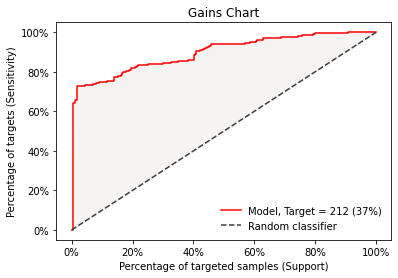

In [163]:
gains_plot(y, y_proba, **{'plot_dict': {'drawstyle'     : 'steps-mid', 
                                        'dash_joinstyle': 'round', 
                                        'snap'          : True}})

According to the results, if we take the 10% of samples with the highest probability, we will get more than 80% of all possible positive cases (malignant). Which means we will find more than 80 patients with malignant tumor from the 100 patients. With an increase of patients to 40%, we already have almost 100% of those which will, in real situation, give a positive response. 

**<font size=4>( 7 ) Lift chart</font>**

A `Lift` chart comes from a `Gains` chart, where the x-axis is the same, but the y-axis is the ratio of the `Gains` value of the model and the `Gains` value of choosing randomly. In other words it shows how many times the model is better than the random choice of cases. We can see that the value of the lift chart at x=100 is 1 because if we choose all samples there would be no lift. The same samples will be picked by both methods.
    
See ( **lift_plot.\_\_doc_\_** ) for required parameters.

---
**<font size=4>( 7.1 ) Cumulative lift</font>**

<AxesSubplot:title={'center':'Lift Chart, Bounds=[0, 100]'}, xlabel='Percentage of targeted samples (Support)', ylabel='Cumulative Lift'>

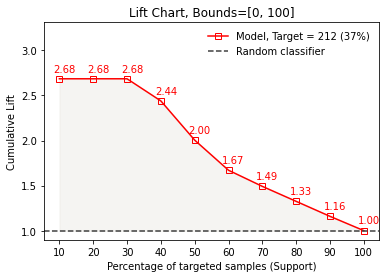

In [164]:
lift_plot(y, y_proba , **{'plot'  : 'cumu', 
                          'bound' : [0,100], 
                          'step'  : 10})

**<font size=4>( 7.2 ) Decile lift</font>**

Unlike `cumulative lift`, `decile lift` uses target and support based on the given decile (not cumulative). It measures how much gains of additional samples would contribute to the prediction comparing without a model (randomness). If `decile lift` is having value larger than 1, that means such decile is better at predicting target than random selection, and if it is less than 1, the model is better at predicting non-target.

<AxesSubplot:title={'center':'Lift Chart, Bounds=[0, 100]'}, xlabel='Percentage of targeted samples (Support)', ylabel='Decile Lift'>

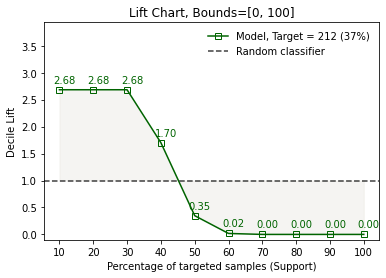

In [165]:
lift_plot(y, y_proba , **{'plot'  : 'decile', 
                          'bound' : [0,100], 
                          'step'  : 10, 
                          'plot_dict' : {'color':'darkgreen'},
                          'font_dict' : {'color':'darkgreen'}})

**<font size=4>( 7.3 ) Target ratio</font>**

The `target ratio` or `target rate` is the number of actual targets over number of targeted samples in each decile. It shows how well predictive model can assign positive response with high probability and negative response with low probability. If the model has a high discriminatory power, the target rate should form a downward pattern.

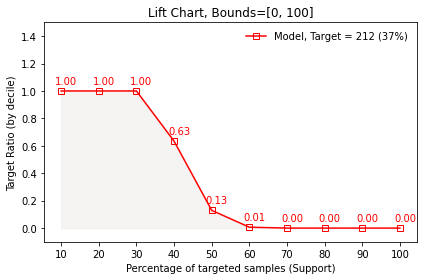

In [166]:
fig, ax = plt.subplots(figsize=(6,4))
lift_plot(y, y_proba, **{'plot':'rate', 
                         'bound':[0,100], 'step':10,
                         'ax':ax,
                         "anno_format":"{:,.2f}".format})
fig.tight_layout()
plt.show()

**<font size=4>( 8 ) eval_classifier</font>**

See ( **eval_classifier.\_\_doc_\_** ) for required parameters.

In [121]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state=0, solver='liblinear', max_iter=1000)
logit.fit(X.iloc[:,:3], y)

LogisticRegression(max_iter=1000, random_state=0, solver='liblinear')

In [122]:
y_logit = logit.predict_proba(X.iloc[:,:3])[:,1].ravel()

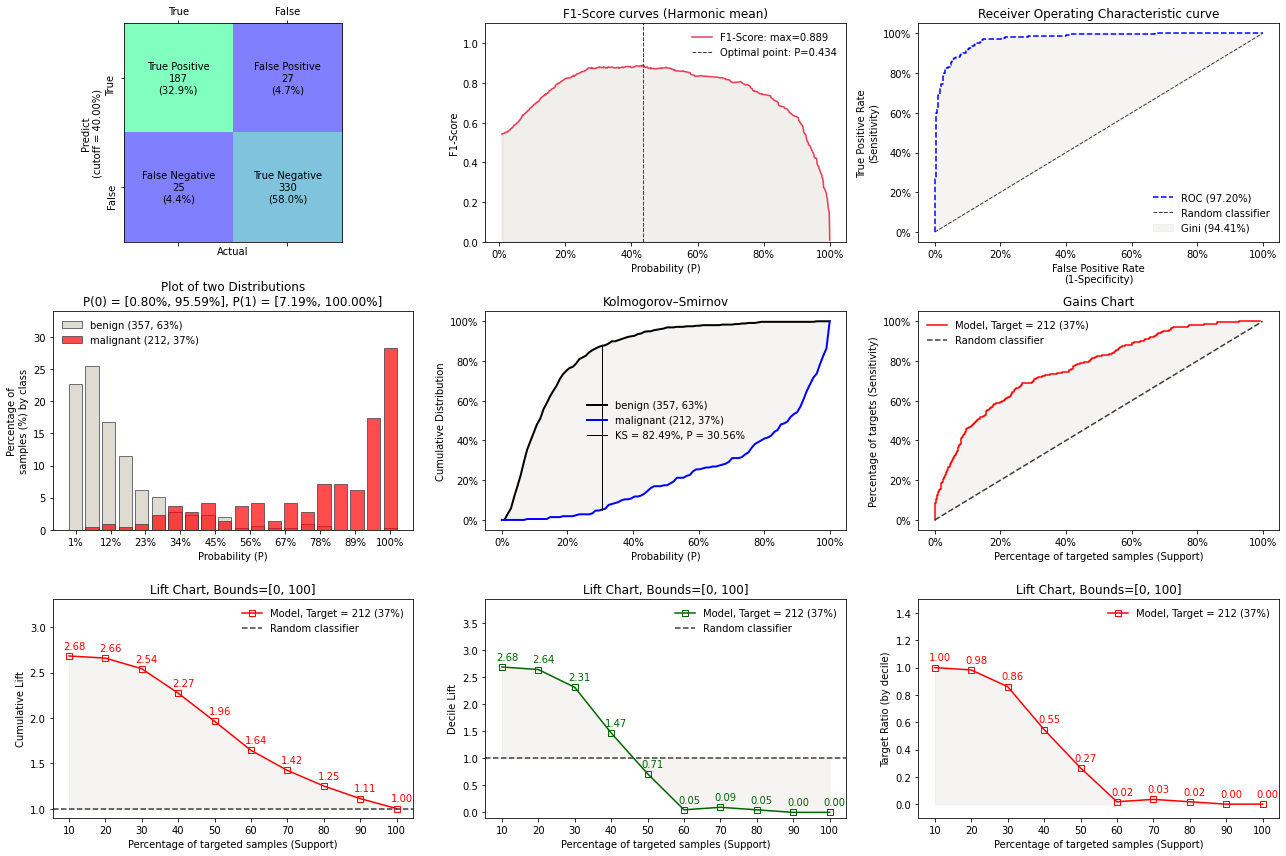

In [171]:
fig = plt.figure(figsize=(18,12))
locs = [(m,n) for m in range(3) for n in range(3)]
params = {'columns':3,
          'ax_dict':[{'threshold':0.4, 'mat_dict':{'cmap':plt.cm.winter}}, 
                     {'fill_dict':{'alpha':0.3, 'linewidth':2}},
                     {'plot_dict':{'color':'blue', 'linestyle':'--'}}, 
                     {'n_tick':10, 'bins':20, 'labels':data().target_names[::-1], 
                      'bar_dict':{'width':0.8, 'alpha':0.7}},
                     {'labels':data().target_names[::-1],'colors':['black','blue']}, 
                     {'plot_dict':{'drawstyle':'steps-mid', 'dash_joinstyle':'round', 'snap':True}}, 
                     {'plot':'cumu', 'bound':[0,100], 'step':10}, 
                     {'plot':'decile', 'bound':[0,100], 'step':10, 
                      'plot_dict':{'color':'darkgreen'},'font_dict':{'color':'darkgreen'}}, 
                     {'plot':'rate', 'bound':[0,100], 'step':10}], 
          'axes'   : [plt.subplot2grid((3,3), loc) for loc in locs]
         }
eval_classifier(y, y_logit, **params)
fig.tight_layout()
plt.show()